# Playing around with Facebook data

I downloaded my Facebook data and have been doing random things with it for a while.

## Extracting messages

The first thing I did was to work on my messages, as these comprise most of my data. The Facebook data archive shows messages in HTML, so I had to parse the HTML files. Messages are archived in descending chronological order (latest messages first), and each thread (user or group chat) is named arbitrarily (not using usernames, group names, or chat IDs).

The following snippet extracts messages from a single HTML file and creates a CSV file. It should be easily extendable to do the same on all of your chats.

In [1]:
import os
import pandas
from bs4 import BeautifulSoup

filename = 'chat.html'

with open(filename) as f:
    print('Reading messages from {}...'.format(filename))
    soup = BeautifulSoup(f.read(), 'html.parser')
    message_headers = soup.find_all('div', class_='message')
    message_headers.reverse()
    messages = [
        {
            'user': message_header.find('span', class_='user').text,
            'date': message_header.find('span', class_='meta').text,
            'message': message_header.next_sibling.text,
        }
        for message_header in message_headers]
    
    print('Writing {} messages to messages.csv...'.format(len(messages)))
    df = pandas.DataFrame.from_dict(messages)
    df.to_csv('messages.csv', encoding='utf-8', index=False)
    print('Done writing messages.')

Reading messages from chat.html...
Writing 187 messages to messages.csv...
Done writing messages.


Let's work with this CSV to plot the number of messages per day.

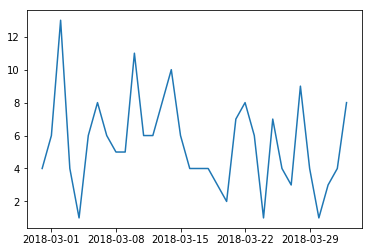

In [4]:
import matplotlib.pyplot
from dateutil.parser import parse

filename = 'messages.csv'

def convert_to_date(message):
    return parse(message.date).date()
   
messages = pandas.read_csv(filename)
message_dates = messages.apply(convert_to_date, axis=1)
messages_by_date = message_dates.groupby(message_dates).count()
matplotlib.pyplot.show(messages_by_date.plot())

## Getting word counts

Another thing we can do is to get the frequency of words. Once we have this, we can create another graph of the most common words, or a word cloud.

In [3]:
import itertools

words_per_message = messages['message'].apply(str.split)
words = list(itertools.chain.from_iterable(words_per_message))
words_series = pandas.Series(words)
print(words_series.groupby(words_series).count().sort_values(ascending=False))

the             221
to              167
and             167
of              131
a                92
our              70
is               67
for              66
in               63
with             60
are              59
on               59
will             55
we               44
that             42
have             41
was              40
I                40
at               39
be               37
by               30
all              28
We               28
&amp;            28
this             26
The              25
not              25
great            22
has              22
U.S.             21
               ... 
hearing!          1
good.             1
going!            1
flunky            1
freely            1
focus             1
following         1
force             1
foreign           1
forged            1
forgotten.        1
former            1
forthcoming.      1
forward.          1
founded           1
fraudulent        1
freeze.           1
giveaways         1
friend            1


There are still some things to improve here:

- We can remove very common words, like articles;
- We don't remove punctuation marks (`,`, `.`, `...`, etc.)

In [6]:
import string

sanitized_words = [word.lower().translate(None, string.punctuation) for word in words]
sanitized_words_series = pandas.Series(sanitized_words)
print(sanitized_words_series.groupby(sanitized_words_series).count().sort_values(ascending=False))

the                          250
and                          177
to                           171
of                           132
a                            104
our                           83
we                            72
in                            69
is                            69
for                           68
with                          63
on                            62
are                           59
will                          57
that                          44
have                          44
great                         42
was                           40
i                             40
at                            39
be                            38
they                          34
all                           31
not                           31
it                            30
by                            30
country                       29
amp                           28
this                          28
you                           28
          